In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('clean_dataset.csv')
df = df.dropna()
df = df[df['RiskCategory'] != 'High Risk']

features = [
    'TotalMinutesAsleep', 
    'TotalSteps', 
    'Calories', 
    'SedentaryMinutes_x', 
    'VeryActiveMinutes_x', 
    'AverageHeartRate'
]

X = df[features]
y = df['RiskCategory']

In [11]:
from sklearn.preprocessing import LabelEncoder

# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded
)

xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [01:29:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [14]:
y_pred_xgb = xgb.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_xgb, target_names=le.classes_))

XGBoost Accuracy: 0.9818181818181818

Classification Report:

              precision    recall  f1-score   support

    Low Risk       0.98      1.00      0.99        50
 Medium Risk       1.00      0.80      0.89         5

    accuracy                           0.98        55
   macro avg       0.99      0.90      0.94        55
weighted avg       0.98      0.98      0.98        55



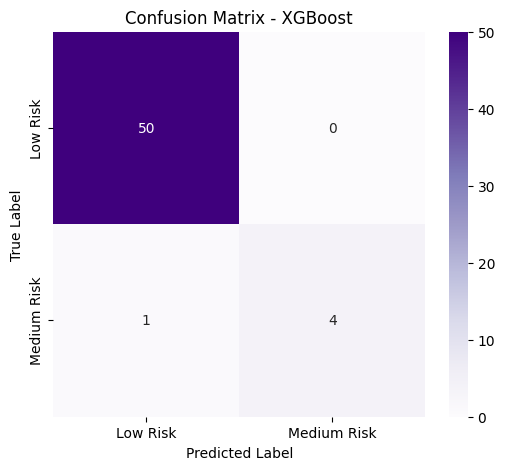

In [15]:
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix_xgb, annot=True, fmt="d", cmap="Purples", 
            xticklabels=le.classes_, 
            yticklabels=le.classes_)
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

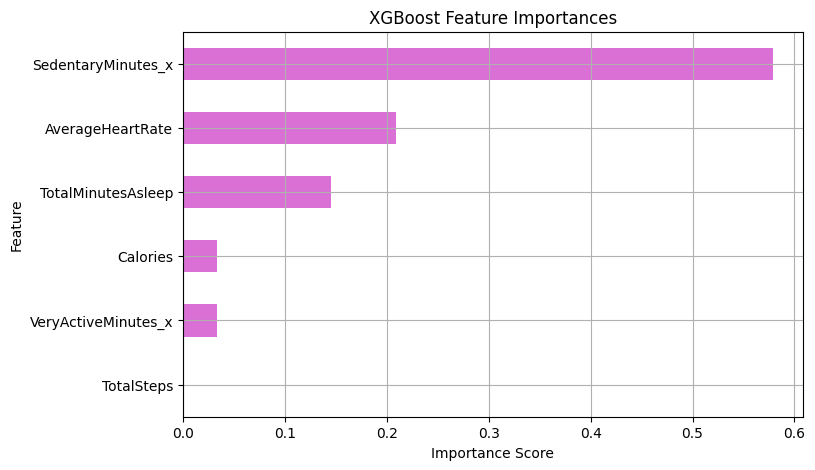

In [16]:
xgb_importances = pd.Series(xgb.feature_importances_, index=features)
plt.figure(figsize=(8,5))
xgb_importances.sort_values(ascending=True).plot(kind='barh', color='orchid')
plt.title('XGBoost Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.grid(True)
plt.show()
